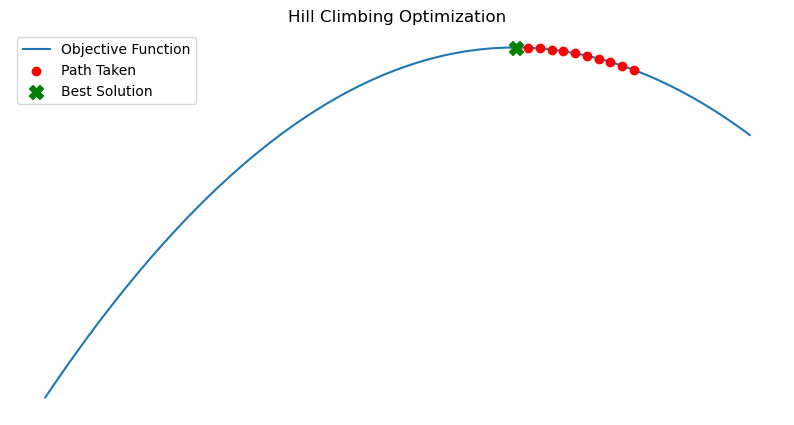

Best x: 2.0119, Best value: 3.9999


In [1]:
# HILL CLIMBING WITH GRAPH
import random
import numpy as np
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.adj_list = {}

    def add_edge(self, node, neighbor):
        if node not in self.adj_list:
            self.adj_list[node] = []
        self.adj_list[node].append(neighbor)

    def get_neighbors(self, node):
        return self.adj_list.get(node, [])

def objective_function(x):
    return -x**2 + 4*x  # Quadratic function to maximize

def heuristic(x):
    return 4 - 2*x  # Derivative (gradient heuristic)

def hill_climb(start_x, step_size=0.1, max_iterations=1000):
    current_x = start_x
    current_value = objective_function(current_x)
    x_history = [current_x]
    y_history = [current_value]
    graph = Graph()

    for _ in range(max_iterations):
        neighbors = [current_x + step_size, current_x - step_size]
        best_neighbor = current_x
        best_value = current_value

        for next_x in neighbors:
            next_value = objective_function(next_x)
            graph.add_edge(current_x, next_x)
            if next_value > best_value:
                best_neighbor, best_value = next_x, next_value

        if best_value > current_value:
            current_x, current_value = best_neighbor, best_value
            x_history.append(current_x)
            y_history.append(current_value)
        else:
            break

    return current_x, current_value, x_history, y_history, graph

# Run Hill Climbing
start_x = random.uniform(-7, 4)
best_x, best_value, x_hist, y_hist, graph = hill_climb(start_x)

# Plot
x_vals = np.linspace(-2, 4, 100)
y_vals = objective_function(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Objective Function')
plt.scatter(x_hist, y_hist, color='red', label='Path Taken', zorder=3)
plt.scatter(best_x, best_value, color='green', marker='X', s=100, label='Best Solution', zorder=4)
plt.xlabel('x')
plt.ylabel('Objective Value')
plt.title('Hill Climbing Optimization')
plt.legend()
plt.grid()
plt.axis("off")
plt.show()

print(f"Best x: {best_x:.4f}, Best value: {best_value:.4f}")
